In [96]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [97]:
df_data = pd.read_csv("us2022q2a.csv")
df_firms = pd.read_csv("usfirms2022.csv")


In [98]:
df_firms.rename(columns = {'Ticker':'firm'}, inplace = True)
df_merged = pd.merge(df_data, df_firms, on="firm", how="left")
df_merged['qdate'] = pd.PeriodIndex(df_merged['q'], freq="Q")
#df_merged.set_index(['firm','qdate'],inplace=True)
df_merged.drop(columns=["Name","N","Class","Country\nof Origin",
                        "Type of Asset","Exchange / Src","Sector NAICS\nlast available","partind",'stockholderequity','Sector\nEconomatica'], inplace=True)

In [99]:
df_merged.set_index(['firm', 'q'])
aux = df_merged['q'] == '2022q1'
aux
df = df_merged[aux]


In [100]:
df = df[df['Sector NAICS\nlevel 1'].isin(['Finance and Insurance', 'Real Estate and Rental and Leasing'])]

In [101]:
df['BookVal'] = df['totalassets'] - df['totalliabilities']
df['MarketVal'] = df['originalprice'] * df['sharesoutstanding']
df['ebit'] = df['revenue'] - df['cogs'] - df['sgae'] - df['otheropexp']
df['NetIncome'] = df['ebit'] - df['finexp'] - df['incometax'] + df['extraincome']

df['ProfMar'] = df['NetIncome'] / df['revenue']
df['EPS'] = df['NetIncome'] / df['sharesoutstanding']
df['EPSP'] = df['EPS'] / df['originalprice']

In [102]:

df['shrt_fin_lev'] = df['shortdebt'] / df['totalassets']
df['lng_fin_lev'] = df['longdebt'] / df['totalassets']
df['op_profit_mrgn'] = df['ebit'] / df['revenue']
df['R'] = np.log(df['adjprice']) - np.log(df['adjprice'].shift(4))

In [103]:
df.describe()

,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,...,MarketVal,ebit,NetIncome,ProfMar,EPS,EPSP,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,R
count,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.460000e+02,7.480000e+02,7.480000e+02,1.820000e+02,...,7.610000e+02,7.460000e+02,7.460000e+02,746.000000,745.000000,745.000000,182.000000,748.000000,745.000000,757.000000
mean,9.119072e+05,3.133992e+05,3.366513e+05,1.614837e+04,-5.589958e+04,8.030914e+03,3.319493e+04,4.391185e+07,3.873140e+07,8.895004e+05,...,9.481661e+06,2.457084e+05,1.485830e+05,NaN,0.866146,0.009333,0.068093,0.181348,-inf,0.006756
std,4.291789e+06,3.405313e+06,1.295260e+06,1.538297e+05,4.220885e+05,6.074566e+04,1.303064e+05,2.401848e+08,2.211812e+08,3.794054e+06,...,3.217756e+07,1.005476e+06,5.980922e+05,NaN,1.792575,0.095545,0.138864,0.232306,NaN,1.575494
min,-6.820000e+02,-1.100000e+04,-5.735160e+05,-7.950410e+05,-5.624000e+06,-1.053553e+06,-1.797860e+05,2.339234e+03,5.000000e+00,0.000000e+00,...,1.554325e+04,-5.544630e+05,-6.510000e+05,-inf,-4.430385,-1.864448,0.000000,0.000000,-inf,-5.300913
25%,2.865022e+04,0.000000e+00,0.000000e+00,0.000000e+00,-2.188175e+04,0.000000e+00,1.950000e+01,1.755401e+06,1.223579e+06,0.000000e+00,...,3.805496e+05,1.043492e+04,2.977849e+03,0.069168,0.138448,0.004697,0.000000,0.014548,0.147910,-0.962847
50%,1.013940e+05,6.485000e+02,3.816500e+03,0.000000e+00,-5.043000e+03,0.000000e+00,2.310000e+03,4.984920e+06,3.536338e+06,1.807950e+04,...,1.510027e+06,3.857750e+04,1.739250e+04,0.243367,0.514355,0.015556,0.009108,0.056035,0.517978,0.051601
75%,3.495750e+05,5.802750e+03,1.413708e+05,0.000000e+00,0.000000e+00,4.778000e+03,1.324850e+04,1.525270e+07,1.136569e+07,2.186235e+05,...,5.378227e+06,1.281018e+05,6.515350e+04,0.388899,0.999123,0.023996,0.050004,0.343164,0.927075,0.964230
max,8.014900e+07,7.319900e+07,1.504100e+07,3.006000e+06,2.829000e+06,4.330000e+05,1.781000e+06,3.954687e+09,3.668788e+09,4.471500e+07,...,4.798303e+08,1.387200e+07,8.282000e+06,inf,16.960636,1.030601,0.673480,1.382343,29.146628,5.627776


In [104]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # de esta manera podemos quitar los infinitos causados por divisiones entre cero

In [105]:
df = df.dropna()

In [106]:
X = df[['shrt_fin_lev','lng_fin_lev','op_profit_mrgn','EPSP','R']]
y = df['R']

## Matriz de correlacion

La correlación es la dependencia entre 2 variables

In [107]:
# Calculate the corretation matrix by using the next formula:
# Corr(X,y) = Cov(X,y)/std(x)*std(y)
N = len(X)
one = np.ones((N,1))
X_1 = X.T @ X
X_2 = X.T @ one
X_3 = X_2.T
VarCovXY = (X_1 - (1/N) * (X_2 @ X_3)) / (N-1)
stdxy = np.diag(VarCovXY)**0.5

std = [[0 for y in range(len(stdxy))] for x in range(len(stdxy))]
for i in range(len(stdxy)):
    for j in range(len(stdxy)):
        std[i][j] = stdxy[i] * stdxy[j]

std = np.array([np.array(s) for s in std])

CorrXY = VarCovXY / std
CorrXY

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP
shrt_fin_lev,1.000000,-0.207909,0.035059,0.228640
lng_fin_lev,-0.207909,1.000000,0.071937,-0.019351
op_profit_mrgn,0.035059,0.071937,1.000000,0.026107
EPSP,0.228640,-0.019351,0.026107,1.000000


In [108]:
X.corr() # uso la función de python para comparar y saber si está correcta

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP
shrt_fin_lev,1.000000,-0.207909,0.035059,0.228640
lng_fin_lev,-0.207909,1.000000,0.071937,-0.019351
op_profit_mrgn,0.035059,0.071937,1.000000,0.026107
EPSP,0.228640,-0.019351,0.026107,1.000000


## Matriz de varianza y covarianza

La varianza mide la dispersión de los valores en un conjunto de datos determinado mientras que la covarianza mide como los cambios de 2 variables se asocian  

In [109]:
N = len(X)
uno = np.ones((len(X),1))
x1 = X.T @ X
x2 = X.T @ uno
x3 = (X.T @ uno).T
m = 1/N

corr_matrix = (x1 - m * (x2 @ x3)) / (N-1)
corr_matrix

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP
shrt_fin_lev,0.017706,-0.006849,0.309933,0.002933
lng_fin_lev,-0.006849,0.061297,1.183260,-0.000462
op_profit_mrgn,0.309933,1.183260,4413.850466,0.167222
EPSP,0.002933,-0.000462,0.167222,0.009295


In [110]:
X.cov() # con la función de python comprobamos que la matriz es correcta

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP
shrt_fin_lev,0.017706,-0.006849,0.309933,0.002933
lng_fin_lev,-0.006849,0.061297,1.183260,-0.000462
op_profit_mrgn,0.309933,1.183260,4413.850466,0.167222
EPSP,0.002933,-0.000462,0.167222,0.009295


Dentro de la matriz, sabemos que la diagonal representa las varianzas, mientras que los valores fuera de la diagonal son las covarianzas entre las variables

## Multicolinealidad 

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

df_vif  = X[['shrt_fin_lev','lng_fin_lev','op_profit_mrgn']]

vif_data["feature"] = df_vif.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)

          feature       VIF
0    shrt_fin_lev  1.031416
1     lng_fin_lev  1.031419
2  op_profit_mrgn  1.000004


'''
CONSIDERANDO 5 COMO NUMERO UMBRAL PARA DEFINIR SI ELIMINAMOS ALGUNA VARIABLE NOTAMOS QUE NO HAY NINGUNA VARIABLE INDEPENDIENTE QUE SUPERE
DICHO UMBRAL, POR LO TANTO PODEMOS ASEGURAR QUE NO HAY MULTICOLINEALIDAD, ES DECIR QUE NO HAY PARES DE VARIABLES INDEPENDIENTES CON UNA 
ALTA CORRELACIÓN
'''

In [119]:
x = X[['shrt_fin_lev','lng_fin_lev','op_profit_mrgn','EPSP']].to_numpy()
y = X['R'].values
y = y.values
x= np.transpose(x)


In [120]:
X.head()

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP,Ones
2332,0.000000,0.000000,-1.280403,-0.017514,1
4132,0.024364,0.127927,0.826009,0.045438,1
4222,0.254991,0.003474,-0.629896,-0.349550,1
6202,0.001657,0.001792,-0.846998,-0.124212,1
7102,0.000000,0.218182,0.623220,0.026921,1


In [121]:
X['Ones'] = 1
x = X[['Ones','shrt_fin_lev','lng_fin_lev','op_profit_mrgn','EPSP']]
xt = x.transpose()
x2 = xt.dot(x)
xinv = np.linalg.inv(x2)
aux = np.dot(xinv, xt)

## Model OLS

In [122]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = sm.add_constant(X)

model_1 = sm.OLS(y, x).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.268
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0130
Time:                        22:07:13   Log-Likelihood:                -348.41
No. Observations:                 176   AIC:                             706.8
Df Residuals:                     171   BIC:                             722.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
shrt_fin_lev      -2.5731      1.062     -2.

## Leverage points

Para conocer los leverage points vamos a conseguir la Hat Matrix
con la fórmula 

$ H = X(X'X)^{-1} X' $

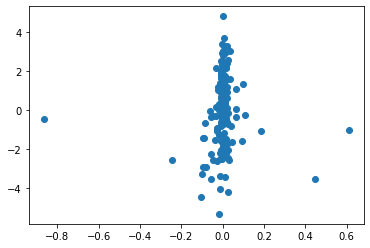

In [123]:
H = x.dot(aux)
leverage = np.diag(H)
plt.scatter(leverage, y)

In [118]:
leverage_points = pd.DataFrame(leverage)
leverage_points.columns = ['leverage_points']
leverage_points.describe()

,leverage_points
count,1.760000e+02
mean,6.686570e-17
std,9.444626e-02
min,-8.628134e-01
25%,-7.662282e-03
50%,1.093144e-03
75%,1.096509e-02
max,6.087558e-01


En la gráfica podemos ver que sí tenemos leverage points. 
Para saber si un leverage point debe ser considerado como tal, tiene que ser mayor al doble de la media. Siguiendo la siguiente operación podremos saber los leverage points altos

$ (2k+2)/n $
Donde k es el número de atributos y n el número de observaciones

tenemos que $ (2*5+2)/176 = 0.05681818 $

Entonces todo punto mayor a 0.05681818 es un high leverage

In [ ]:
leverage_new = leverage_points[leverage_points['leverage_points'] <= 0.05681818]
leverage_new.describe()

,leverage_points
count,163.000000
mean,0.014148
std,0.008746
min,0.005778
25%,0.007964
50%,0.011700
75%,0.014755
max,0.053468


## Outliers

Para conocer los outliers, usaremos la funcion cook_distance de python y standarized residuals

In [ ]:
influence = model_1.get_influence()
std_res = influence.resid_studentized_internal



std_res = pd.DataFrame(std_res)
std_res.describe()


,0
count,176.000000
mean,2.165642
std,28.783550
min,-0.445504
25%,-0.005787
50%,-0.002838
75%,-0.000193
max,381.852659


Al usar este metodo, se considera como outlier aquellas observaciones cuyo valor absoluto sea mayor a 3 

In [ ]:
mask2 = abs(std_res[0]) >= 3
outlier_res = std_res[mask2]
outlier_res

,0
167,381.852659


In [124]:
influence = model_1.get_influence()
inf_sum = influence.summary_frame()

#print(inf_sum.head())

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

In [125]:
cooks = pd.DataFrame(cooks)
cooks.describe() # datos 3 veces mayores a la media 

,0
count,1.760000e+02
mean,6.215927e-01
std,7.969405e+00
min,1.159017e-08
25%,2.487879e-04
50%,1.442729e-03
75%,4.383323e-03
max,1.057056e+02


Con cook_distance sabemos que una observacion es un outlier si tiene un valor mayor a la media multiplicada por 3

In [126]:
mask1 = abs(cooks[0]) > cooks[0].mean()*3
outlier_cooks = cooks[mask1]
outlier_cooks

,0
75,2.966143
167,105.705648


In [127]:
# Juntamos los leverage points con los ouliers encontrados
influential_val = pd.merge(leverage_points, outlier_cooks, left_index=True, right_index=True)
influential_val = pd.merge(influential_val, outlier_res, left_index=True, right_index=True)

Ahora ya tengo todos los valores influenciables, los cuales eliminaremos mas adelante y generaremos un nuevo modelo sin ellos

## Modelo con algebra matricial
#### Estimacion de coeficientes beta

In [128]:
X['Ones'] = 1                

X_trans = X.T                 
X_aux = X_trans @ X           
X_inv = np.linalg.inv(X_aux)  
X_again = X_inv @ X_trans     
Betas = X_again @ y           
print(Betas)

0   -2.573057
1    0.148916
2    0.004193
3    2.940199
4    0.212216
dtype: float64


## Estimación de errores estándar

Usamos la fórmula del mean square error

In [129]:
# predicciones
y_pred = sum((Betas.to_numpy() * X.to_numpy()).T)

# formula del mean square error
error = sum((y - y_pred)**2) / len(y)
error

3.068869731647362

## Modelo2 , sin valores influenciables

In [ ]:
# para evitar que el comportamiento del modelo se vea afectado por los puntos 
# influenciables, tenemos que quitar dichos puntos 
X2 = X.copy()
y2 = y.copy()

X2 = X2.drop(influential_val.index)
y2 = y2.drop(influential_val.index)

In [131]:
X2

,shrt_fin_lev,lng_fin_lev,op_profit_mrgn,EPSP,Ones
2332,0.000000,0.000000,-1.280403,-0.017514,1
4132,0.024364,0.127927,0.826009,0.045438,1
4222,0.254991,0.003474,-0.629896,-0.349550,1
6202,0.001657,0.001792,-0.846998,-0.124212,1
7102,0.000000,0.218182,0.623220,0.026921,1
...,...,...,...,...,...
311664,0.000000,0.000000,0.301759,0.016728,1
312564,0.000244,0.319127,0.225717,-0.011925,1
313194,0.000000,0.033851,0.024105,0.000380,1
318504,0.000000,0.295221,0.431877,0.027257,1


In [132]:
# generamos el nuevo modelo sin puntos influenciables
model2 = sm.OLS(y2, sm.add_constant(X2)).fit()
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.268
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0130
Time:                        22:08:57   Log-Likelihood:                -348.41
No. Observations:                 176   AIC:                             706.8
Df Residuals:                     171   BIC:                             722.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
shrt_fin_lev      -2.5731      1.062     -2.

In [133]:
#Calculamos de nuevo las betas
Xnew_trans = X2.T             
Xnew_aux = Xnew_trans @ X2    
X_inv = np.linalg.inv(Xnew_aux)  
X_again = X_inv @ Xnew_trans     
Betas = X_again @ y2       
print(Betas)

0   -2.573057
1    0.148916
2    0.004193
3    2.940199
4    0.212216
dtype: float64


Los coeficientes de las betas obtenidos coinciden con los obtenidos en el modelo generado con python. entonces sabemos que el calculo fue correcto